In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer=load_breast_cancer()

In [17]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
X=cancer.data
y=cancer.target

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model=KNeighborsClassifier(n_neighbors=34)

In [27]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=34)

In [28]:
y_pred=model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9440559440559441


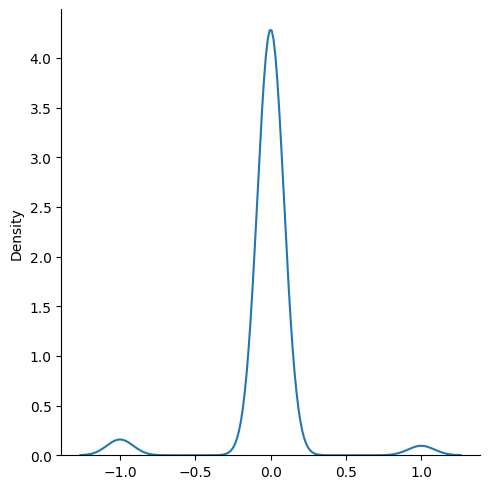

In [30]:
import seaborn as khargosh
khargosh.displot(y_test-y_pred, kind='kde')

In [33]:
clf.score(X_train, y_train)

0.9366197183098591

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

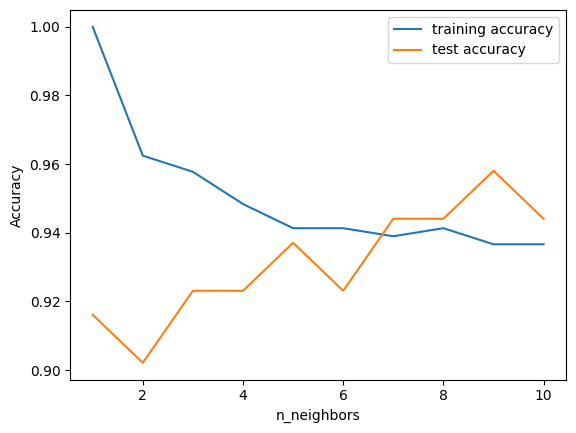

In [32]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

###KNN Regression

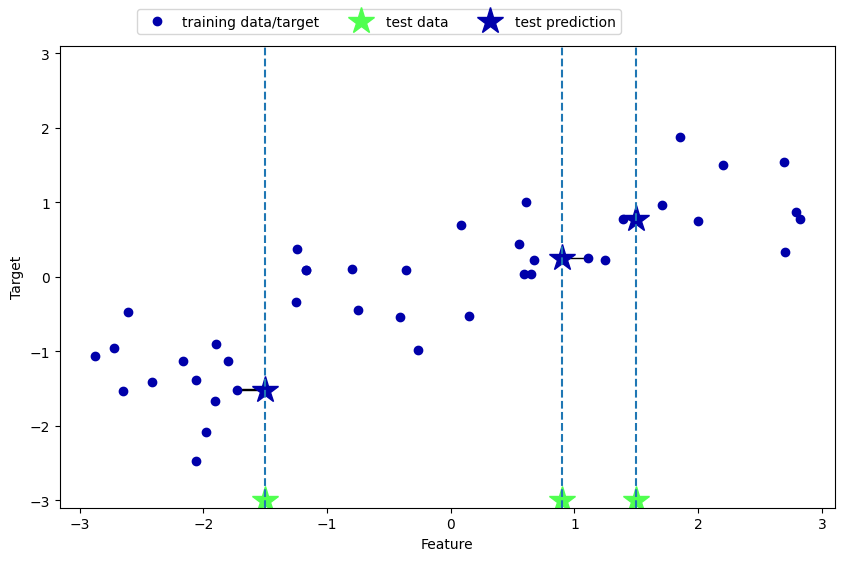

In [36]:
import mglearn
mglearn.plots.plot_knn_regression(n_neighbors=1)

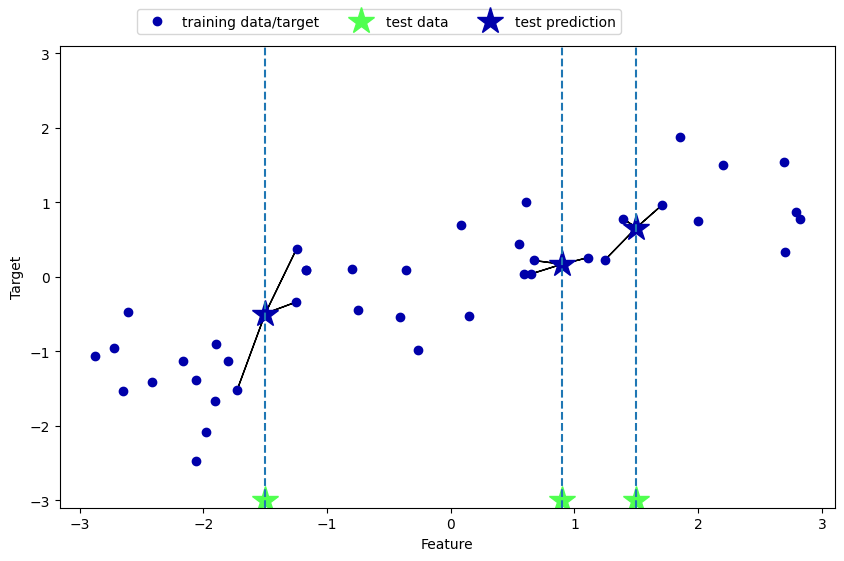

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
X,y=mglearn.datasets.make_wave(n_samples=40)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [96]:
model=KNeighborsRegressor(n_neighbors=3)

In [97]:
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [98]:
y_pred=model.predict(X_test)

In [99]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8344172446249605


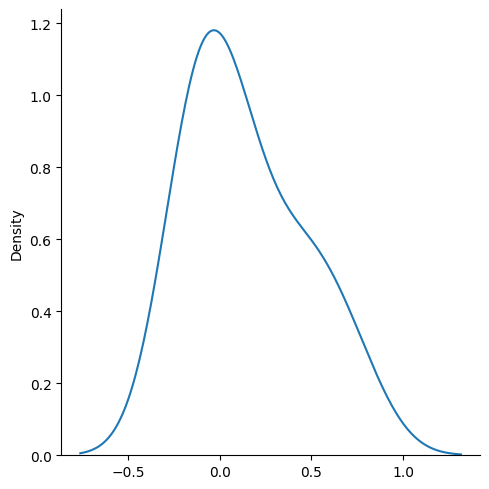

In [100]:
import seaborn as a
a.displot(y_test-y_pred,kind='kde')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

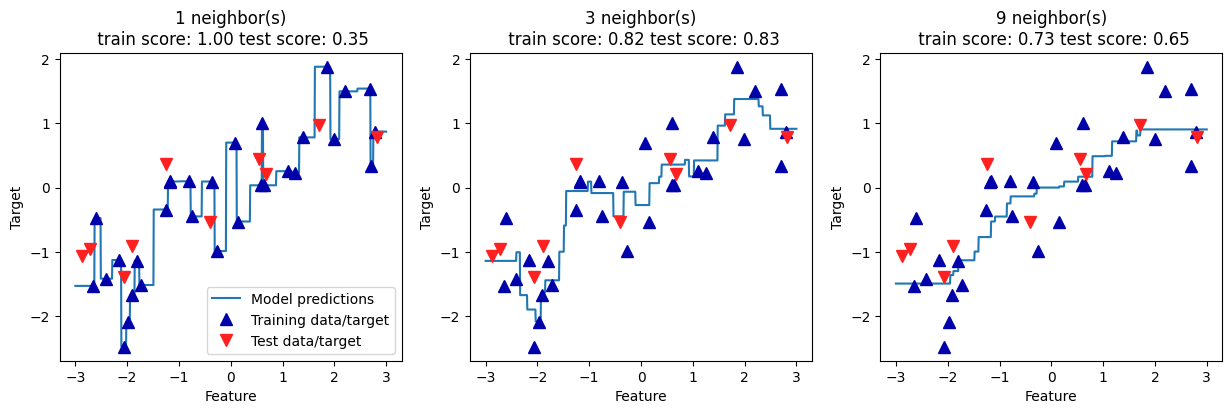

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # make predictions using 1, 3, or 9 neighbors
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Feature")
 ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
 "Test data/target"], loc="best")
